Model Performance Comparison:

Linear Regression:
MAE: 22.3363
RMSE: 25.8910
R² Score: -0.0018

Decision Tree:
MAE: 29.7685
RMSE: 36.5931
R² Score: -1.0011

Random Forest:
MAE: 23.1978
RMSE: 27.4176
R² Score: -0.1234

XGBoost:
MAE: 23.3558
RMSE: 27.6485
R² Score: -0.1424


C:\Users\deepi\AppData\Local\Temp\ipykernel_20832\3747142819.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["Hour"], y=df["Ridership_Count"], ci=None, marker="o", color="blue")


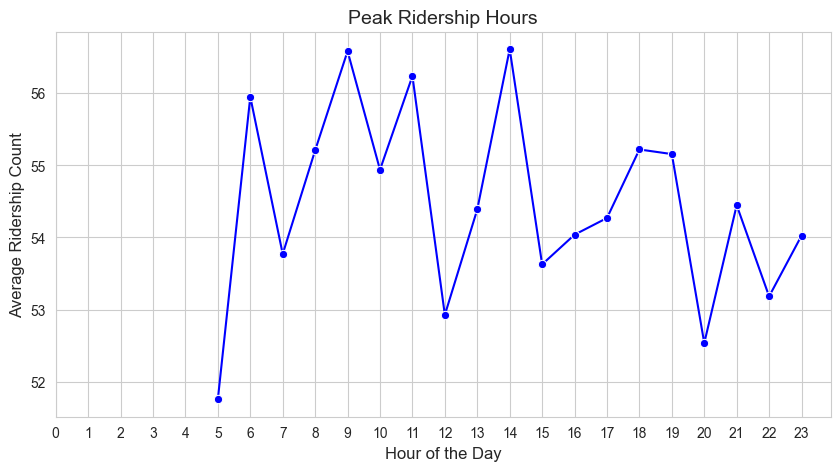

C:\Users\deepi\AppData\Local\Temp\ipykernel_20832\3747142819.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Day"], y=df["Ridership_Count"], palette="coolwarm")


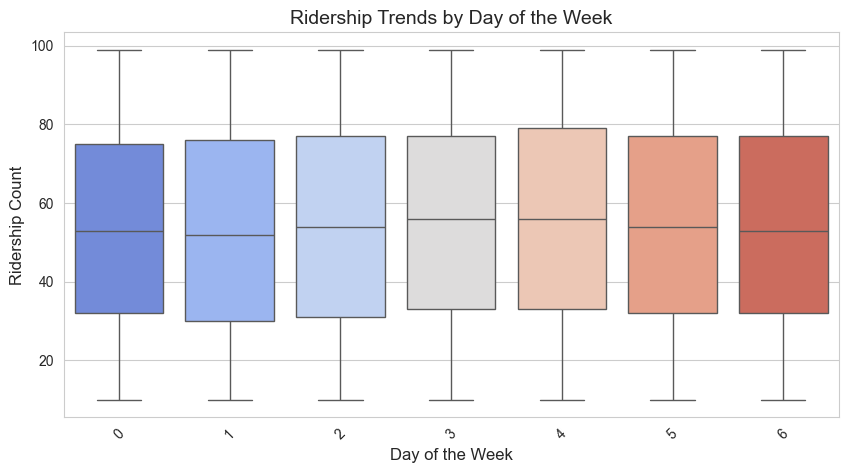

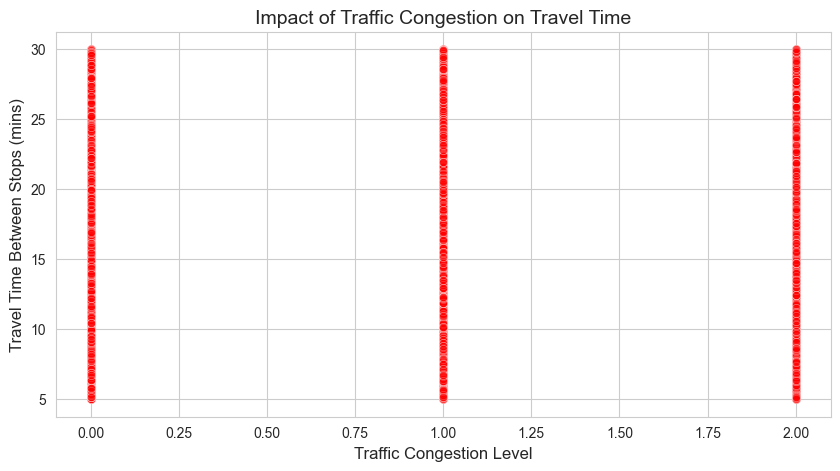

C:\Users\deepi\AppData\Local\Temp\ipykernel_20832\3747142819.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Weather_Conditions"], y=df["On_Time_Performance"], palette="viridis")


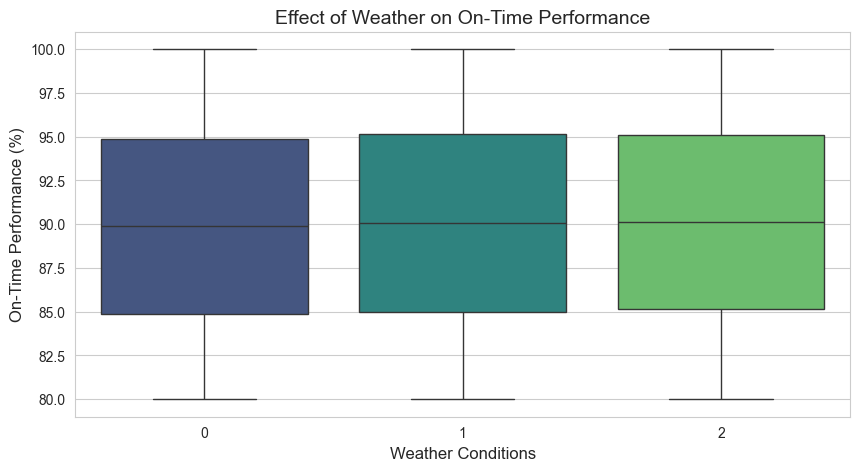

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the synthetic dataset
file_path = "bengaluru_public_transport_data.csv"  # Update this path if needed
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert Date and Time into a single DateTime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time_of_Day"])

# Convert categorical variables to numeric labels
categorical_columns = ["Traffic_Congestion_Level", "Weather_Conditions", "Road_Type", "Income_Levels"]
for col in categorical_columns:
    df[col] = df[col].astype("category").cat.codes

# Drop redundant columns
df = df.drop(columns=["Date", "Time_of_Day"])

# Extract time-based features
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.day_name()

# Convert categorical 'Day' into numeric representation
df["Day"] = df["Day"].astype("category").cat.codes

# Define features (X) and target variable (y)
feature_cols = ["Hour", "Day", "Traffic_Congestion_Level", "Weather_Conditions", "Travel_Time_Between_Stops"]
target_col = "Ridership_Count"

X = df[feature_cols]
y = df[target_col]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Basic Models
linear_model = LinearRegression().fit(X_train, y_train)
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# Train Advanced Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb_model = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predictions & Model Evaluation
models = {
    "Linear Regression": linear_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R² Score": r2_score(y_test, y_pred)
    }

# Print results
print("Model Performance Comparison:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualization - Peak Ridership Hours
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Hour"], y=df["Ridership_Count"], ci=None, marker="o", color="blue")
plt.title("Peak Ridership Hours", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Ridership Count", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# Ridership Trends by Day of the Week
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Day"], y=df["Ridership_Count"], palette="coolwarm")
plt.title("Ridership Trends by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Ridership Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Impact of Congestion on Travel Time
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Traffic_Congestion_Level"], y=df["Travel_Time_Between_Stops"], alpha=0.5, color="red")
plt.title("Impact of Traffic Congestion on Travel Time", fontsize=14)
plt.xlabel("Traffic Congestion Level", fontsize=12)
plt.ylabel("Travel Time Between Stops (mins)", fontsize=12)
plt.show()

# Effect of Weather on On-Time Performance
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Weather_Conditions"], y=df["On_Time_Performance"], palette="viridis")
plt.title("Effect of Weather on On-Time Performance", fontsize=14)
plt.xlabel("Weather Conditions", fontsize=12)
plt.ylabel("On-Time Performance (%)", fontsize=12)
plt.show()


In [5]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "demand_prediction_xgboost.pkl")

print("Model saved successfully!")


Model saved successfully!
